In [1]:
#-*- coding: utf-8 -*-
import sys
reload(sys)

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd
d1 = pd.read_csv("../../static/statistics/del.csv", names=['시간대', '업종', '통화건수'], header=None)

In [4]:
d2 = pd.read_csv("../../static/statistics/del_food.csv", names=['업종', '통화건수 합'], header=None)

In [5]:
d3 = pd.read_csv("../../static/statistics/del_time.csv", names=['시간대', '통화건수 합'], header=None)

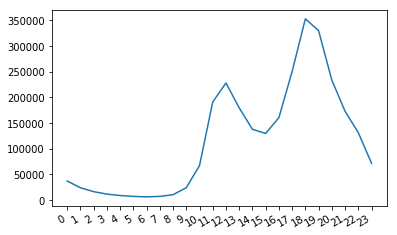

In [6]:
import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = list(d3['시간대'])
y = list(d3['통화건수 합'])

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()

In [27]:
import plotly.subplots as tls
from plotly.subplots import make_subplots
import cufflinks as cf
import pandas as pd
import plotly.graph_objects as go
import plotly

cf.go_offline()


In [34]:
fig = tls.make_subplots(
    rows=8, cols=3,
   # specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],
   #        [{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],
   #        [{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],
   #        [{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],
   #        [{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}],
   #        [{"type": "pie"},{"type": "pie"},{"type": "pie"},{"type": "pie"}]]
    specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
           [{"type": "pie"},{"type": "pie"},{"type": "pie"}]]
)

v= d1.groupby('시간대').size().reset_index(name="통화건수")
time = list(v['시간대'])


row = 1
col = 1
for i in time:
    pie_data = d1[d1['시간대'] == i]

    fig.append_trace(go.Pie(name=i, title=str(i)+"시", textinfo="label", labels=pie_data['업종'], values=pie_data['통화건수']), row=row, col=col)

    col += 1

    if( col % 4 == 0):
        col = 1
        row += 1
        
fig.update_traces(hole=.4, hoverinfo="percent")
fig.update_layout(
    title="시간대별 업종 배달량",
    autosize=False, 
    showlegend=False,
    width=1000,
    height=2000
)

#plotly.offline.plot(fig, filename='delivery_food.html')

In [33]:
x = d3['시간대']
y = d3['통화건수 합']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode='lines+markers', name='lines+markers'))
fig.update_layout(title='시간대별 배달량',
                   xaxis_title='시간대',
                   yaxis_title='배달량')
fig.show()
plotly.offline.plot(fig, filename='delivery_time.html')

'delivery_time.html'